In [1]:
%load_ext autoreload
%autoreload 2
from src.data_collection import *
from src.data_processing import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


/home/bruno/GitProjs/DALAS-project/dalas_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Create setup:

In [2]:
import os
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/clean", exist_ok=True)
os.makedirs("data/compressed", exist_ok=True)

# Data scraping from Wikipedia lists:

In [3]:
urls = [
"https://en.wikipedia.org/wiki/List_of_fiction_works_made_into_feature_films_(0-9,_A-C)",
"https://en.wikipedia.org/wiki/List_of_fiction_works_made_into_feature_films_(D-J)",
"https://en.wikipedia.org/wiki/List_of_fiction_works_made_into_feature_films_(K-R)",
"https://en.wikipedia.org/wiki/List_of_fiction_works_made_into_feature_films_(S-Z)",
"http://en.wikipedia.org/wiki/List_of_short_fiction_made_into_feature_films",
"https://en.wikipedia.org/wiki/List_of_children%27s_books_made_into_feature_films",
#"https://en.wikipedia.org/wiki/List_of_films_based_on_comics"
]
df = scrape_wikipedia_list(urls)
df.columns=['book','author_book','film',"year_book", "year_film"]

df # fix later


,Book,author_book,Film,Year_book,Year_film
0,The 25th Hour,David Benioff,25th Hour,2001,2002
1,3 Assassins,Kōtarō Isaka,Grasshopper,2004,2015
2,4.50 from Paddington,Agatha Christie,"Murder, She Said",1957,1961
3,4.50 from Paddington,Agatha Christie,Crime Is Our Business,1957,2008
4,58 Minutes,Walter Wager,Die Hard 2,1987,1990
...,...,...,...,...,...
5806,Z for Zachariah,Robert C. O'Brien,Z for Zachariah,1974,2015
5807,Zathura,Chris Van Allsburg,Zathura,2002,2005
5808,Zenon: Girl of the 21st Century,Marilyn Sadler,Zenon: Girl of the 21st Century,1997,1999
5809,Zenon: Girl of the 21st Century,Marilyn Sadler,Zenon: The Zequel,1997,2001


# Scraping tmdb data:

In [4]:

needed = False
if (needed==True): 
    data = {
    "book" : [],
    "author_book": [],
    "film" : [],
    "date_film" : [],
    "runtime" : [],
    "original_language":[],
    "votes_film" : [],
    "overview_film" : [],
    "vote_count_film" : [],
    "popularity_film" : [],
    "budget_film" : [],
    "revenue_film" : [],
    "genre_film" : [],
    "director" : [],
    "actor1" : [],
    "actor2" : [],
    "actor3" : []
}
    for i in tqdm(range(len(df))):
        n = df["film"][i]
        y = df["year_film"][i]
        k = tmdb_search_movie(n,year=y)
        if k is not None and "id" in list(k.keys()):
            k = tmdb_get_movie_details(k["id"])
        if k is not None:
            data["votes_film"].append(k["vote_average"])
            data["Film"].append(k["original_title"])
            data["date_film"].append(k["release_date"])
            data["overview_film"].append(k["overview"])        
            data["vote_count_film"].append(k["vote_count"])
            data["popularity_film"].append(k["popularity"])
            data["genre_film"].append(k["genres"])
            data["original_language"].append(k["original_language"])
            data["runtime"].append(k["runtime"])
            direc = None
            if 'credits' in k and 'crew' in k['credits']:
                for person in k['credits']['crew']:
                    if person['job'] == 'Dcirector':
                        data["director"].append(person['name'])
                        direc = person['name']
                        break
            if direc is None:
                data['director'].append(np.nan)
            if 'credits' in k and 'cast' in k['credits']:
                for ii in range(min(3, len(k['credits']['cast']))):
                    data[f"actor{ii+1}"].append(k['credits']['cast'][ii]['name'])
                for ii in range(len(k['credits']['cast']), 3):
                    data[f"actor{ii+1}"].append(np.nan)
    
            if "budget" in list(k.keys()):
                data["budget_film"].append(k["budget"])
            else: 
                data["budget_film"].append(np.nan)
            if "revenue" in list(k.keys()): 
                data["revenue_film"].append(k["revenue"])
            else: 
                data["revenue_film"].append(np.nan)
        else: 
            data["votes_film"].append(np.nan)
            data["film"].append(n)
            data["date_film"].append(str(y))
            data["overview_film"].append(np.nan)
            data["vote_count_film"].append(np.nan)
            data["popularity_film"].append(np.nan)
            data["budget_film"].append(np.nan)
            data["revenue_film"].append(np.nan)
            data["genre"].append(np.nan)
            data["director"].append(np.nan)
            data["actor1"].append(np.nan)
            data["actor2"].append(np.nan)
            data["actor3"].append(np.nan)
            data["original_language"].append(np.nan)
            data["runtime"].append(np.nan)
        data["book"].append(df["book"][i])
        data["author_book"].append(df["author_book"][i])
    df = pd.DataFrame(data)
    df.to_csv("data/raw/movie_adaptation_list.csv")
    display(df)
else:
    df = pd.read_csv("data/raw/movie_adaptation_list.csv")
df

,Unnamed: 0,Book,author_book,Film,date_film,runtime,original_language,votes_film,overview_film,vote_count_film,popularity_film,budget_film,revenue_film,Genre,Director,Actor1,Actor2,Actor3
0,0,The 25th Hour,David Benioff,25th Hour,2002-12-19,135.0,en,7.320,In New York City in the days following the eve...,2463.0,1.6693,5000000.0,23932055.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",Spike Lee,Edward Norton,Philip Seymour Hoffman,Barry Pepper
1,1,3 Assassins,Kōtarō Isaka,グラスホッパー,2015-11-07,119.0,ja,5.800,Movie contains the stories of three people: Su...,13.0,2.8248,0.0,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",Tomoyuki Takimoto,Tadanobu Asano,Toma Ikuta,Ryosuke Yamada
2,2,4.50 from Paddington,Agatha Christie,Murder She Said,1961-09-26,87.0,en,7.316,Miss Marple believes she's seen a murder in a ...,220.0,1.5435,0.0,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",George Pollock,Margaret Rutherford,Arthur Kennedy,Muriel Pavlow
3,3,4.50 from Paddington,Agatha Christie,Le crime est notre affaire,2008-10-02,109.0,fr,5.883,"Loosely based on ""4.50 from Paddington"" by Aga...",94.0,1.3903,12000000.0,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",Pascal Thomas,Catherine Frot,André Dussollier,Claude Rich
4,4,58 Minutes,Walter Wager,Die Hard 2,1990-07-03,124.0,en,7.000,"One year after his heroics in Los Angeles, Joh...",6138.0,10.1991,70000000.0,240031094.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Renny Harlin,Bruce Willis,Bonnie Bedelia,William Sadler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5806,Z for Zachariah,Robert C. O'Brien,Z for Zachariah,2015-08-13,97.0,en,5.687,"In the wake of a nuclear war, a young woman su...",966.0,4.2727,0.0,121461.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Craig Zobel,Margot Robbie,Chiwetel Ejiofor,Chris Pine
5807,5807,Zathura,Chris Van Allsburg,Zathura: A Space Adventure,2005-11-06,101.0,en,6.430,"After their father is called into work, two yo...",3442.0,4.6720,65000000.0,65079104.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",Jon Favreau,Josh Hutcherson,Jonah Bobo,Dax Shepard
5808,5808,Zenon: Girl of the 21st Century,Marilyn Sadler,Zenon: Girl of the 21st Century,1999-01-23,97.0,en,6.000,"Zenon Kar, a 13-year-old girl who lives on a s...",183.0,1.1965,0.0,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",Kenneth Johnson,Kirsten Storms,Raven-Symoné,Stuart Pankin
5809,5809,Zenon: Girl of the 21st Century,Marilyn Sadler,Zenon: The Zequel,2001-01-12,89.0,en,5.600,Zenon Kar is 15 and lives on a space station w...,108.0,1.3710,0.0,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 10770...",Manny Coto,Kirsten Storms,Shadia Simmons,Lauren Maltby


In [5]:
import json
df["Book"] = df["Book"].str.lower()
df2 = pd.read_csv("data/raw/booksummaries.csv",sep="\t")
df2.columns=["a1","a2","Book","Author","Year","Genre","Overview"]
df2 = df2.drop(columns=["a1","a2"])
df2["Book"] = df2["Book"].str.lower()
genres = []
for i in df2["Genre"]:
    if isinstance(i,str):
        genres.append(list(json.loads(i).values()))
    else:
        genres.append(np.nan)
df2["Genre"] = genres
overviews = []
genres = []
for i in df["Book"]:
    overview = np.nan
    genre = np.nan
    if (df2["Book"] == i).any():
        overview = df2.loc[df2["Book"] == i, "Overview"].iloc[0]
        genre = df2.loc[df2["Book"] == i, "Genre"].iloc[0]
    overviews.append(overview)
    genres.append(genre)
df["overview_book"] = overviews
df["Genre_book"] = genres
df

,Unnamed: 0,Book,author_book,Film,date_film,runtime,original_language,votes_film,overview_film,vote_count_film,popularity_film,budget_film,revenue_film,Genre,Director,Actor1,Actor2,Actor3,overview_book,Genre_book
0,0,the 25th hour,David Benioff,25th Hour,2002-12-19,135.0,en,7.320,In New York City in the days following the eve...,2463.0,1.6693,5000000.0,23932055.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",Spike Lee,Edward Norton,Philip Seymour Hoffman,Barry Pepper,New York drug dealer Monty Brogan is arrested...,[Fiction]
1,1,3 assassins,Kōtarō Isaka,グラスホッパー,2015-11-07,119.0,ja,5.800,Movie contains the stories of three people: Su...,13.0,2.8248,0.0,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",Tomoyuki Takimoto,Tadanobu Asano,Toma Ikuta,Ryosuke Yamada,NaN,NaN
2,2,4.50 from paddington,Agatha Christie,Murder She Said,1961-09-26,87.0,en,7.316,Miss Marple believes she's seen a murder in a ...,220.0,1.5435,0.0,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",George Pollock,Margaret Rutherford,Arthur Kennedy,Muriel Pavlow,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
3,3,4.50 from paddington,Agatha Christie,Le crime est notre affaire,2008-10-02,109.0,fr,5.883,"Loosely based on ""4.50 from Paddington"" by Aga...",94.0,1.3903,12000000.0,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",Pascal Thomas,Catherine Frot,André Dussollier,Claude Rich,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
4,4,58 minutes,Walter Wager,Die Hard 2,1990-07-03,124.0,en,7.000,"One year after his heroics in Los Angeles, Joh...",6138.0,10.1991,70000000.0,240031094.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Renny Harlin,Bruce Willis,Bonnie Bedelia,William Sadler,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5806,z for zachariah,Robert C. O'Brien,Z for Zachariah,2015-08-13,97.0,en,5.687,"In the wake of a nuclear war, a young woman su...",966.0,4.2727,0.0,121461.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Craig Zobel,Margot Robbie,Chiwetel Ejiofor,Chris Pine,"Ann Burden's diary begins on Monday, May 20. ...","[Science Fiction, Speculative fiction, Childre..."
5807,5807,zathura,Chris Van Allsburg,Zathura: A Space Adventure,2005-11-06,101.0,en,6.430,"After their father is called into work, two yo...",3442.0,4.6720,65000000.0,65079104.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",Jon Favreau,Josh Hutcherson,Jonah Bobo,Dax Shepard,NaN,NaN
5808,5808,zenon: girl of the 21st century,Marilyn Sadler,Zenon: Girl of the 21st Century,1999-01-23,97.0,en,6.000,"Zenon Kar, a 13-year-old girl who lives on a s...",183.0,1.1965,0.0,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",Kenneth Johnson,Kirsten Storms,Raven-Symoné,Stuart Pankin,NaN,NaN
5809,5809,zenon: girl of the 21st century,Marilyn Sadler,Zenon: The Zequel,2001-01-12,89.0,en,5.600,Zenon Kar is 15 and lives on a space station w...,108.0,1.3710,0.0,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 10770...",Manny Coto,Kirsten Storms,Shadia Simmons,Lauren Maltby,NaN,NaN


In [8]:
df2 = text_process_dataframe(df,["overview_film","overview_book"])

100%|███████████████████████████████████████████| 5811/5811 [28:00<00:00,  3.46it/s]


In [9]:
df2

,Unnamed: 0,Book,author_book,Film,date_film,runtime,original_language,votes_film,overview_film,vote_count_film,...,revenue_film,Genre,Director,Actor1,Actor2,Actor3,overview_book,Genre_book,overview_film_encoded,overview_book_encoded
0,0,the 25th hour,David Benioff,25th Hour,2002-12-19,135.0,en,7.320,In New York City in the days following the eve...,2463.0,...,23932055.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",Spike Lee,Edward Norton,Philip Seymour Hoffman,Barry Pepper,New York drug dealer Monty Brogan is arrested...,[Fiction],"[[0.013322054, -0.03240332, -0.071534246, -0.0...","[[0.019042209, -0.03723497, -0.057174917, -0.0..."
1,1,3 assassins,Kōtarō Isaka,グラスホッパー,2015-11-07,119.0,ja,5.800,Movie contains the stories of three people: Su...,13.0,...,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",Tomoyuki Takimoto,Tadanobu Asano,Toma Ikuta,Ryosuke Yamada,NaN,NaN,"[[-0.07211089, 0.023693489, -0.070638835, -0.0...",NaN
2,2,4.50 from paddington,Agatha Christie,Murder She Said,1961-09-26,87.0,en,7.316,Miss Marple believes she's seen a murder in a ...,220.0,...,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",George Pollock,Margaret Rutherford,Arthur Kennedy,Muriel Pavlow,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]","[[0.06292259, 8.6657165e-05, 0.015638864, 0.04...","[[0.022535432, -0.09175499, 0.03518077, -0.040..."
3,3,4.50 from paddington,Agatha Christie,Le crime est notre affaire,2008-10-02,109.0,fr,5.883,"Loosely based on ""4.50 from Paddington"" by Aga...",94.0,...,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",Pascal Thomas,Catherine Frot,André Dussollier,Claude Rich,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]","[[0.03684985, 0.039675537, 0.033876117, -0.032...","[[0.022535432, -0.09175499, 0.03518077, -0.040..."
4,4,58 minutes,Walter Wager,Die Hard 2,1990-07-03,124.0,en,7.000,"One year after his heroics in Los Angeles, Joh...",6138.0,...,240031094.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Renny Harlin,Bruce Willis,Bonnie Bedelia,William Sadler,NaN,NaN,"[[0.001303937, -0.05956626, 0.018681588, -0.04...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5806,z for zachariah,Robert C. O'Brien,Z for Zachariah,2015-08-13,97.0,en,5.687,"In the wake of a nuclear war, a young woman su...",966.0,...,121461.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Craig Zobel,Margot Robbie,Chiwetel Ejiofor,Chris Pine,"Ann Burden's diary begins on Monday, May 20. ...","[Science Fiction, Speculative fiction, Childre...","[[-0.0043280185, -0.024808561, -0.008905598, 0...","[[-0.08778935, 0.018681465, 0.06705429, 0.0263..."
5807,5807,zathura,Chris Van Allsburg,Zathura: A Space Adventure,2005-11-06,101.0,en,6.430,"After their father is called into work, two yo...",3442.0,...,65079104.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",Jon Favreau,Josh Hutcherson,Jonah Bobo,Dax Shepard,NaN,NaN,"[[-0.051167563, 0.033402923, -0.06098483, -0.0...",NaN
5808,5808,zenon: girl of the 21st century,Marilyn Sadler,Zenon: Girl of the 21st Century,1999-01-23,97.0,en,6.000,"Zenon Kar, a 13-year-old girl who lives on a s...",183.0,...,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",Kenneth Johnson,Kirsten Storms,Raven-Symoné,Stuart Pankin,NaN,NaN,"[[-0.06547427, 0.00043350115, -0.009626605, -0...",NaN
5809,5809,zenon: girl of the 21st century,Marilyn Sadler,Zenon: The Zequel,2001-01-12,89.0,en,5.600,Zenon Kar is 15 and lives on a space station w...,108.0,...,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 10770...",Manny Coto,Kirsten Storms,Shadia Simmons,Lauren Maltby,NaN,NaN,"[[-0.14011724, 0.021095758, -0.04444952, -0.06...",NaN


In [18]:
count_nan_year = (df["date_film"].isnull()).sum().sum()
count_nan_director = (df["Director"].isnull()).sum().sum()
count_nan_budget = (df["budget_film"] > 0).sum().sum()
count_nan_revenue = (df["revenue_film"] > 0).sum().sum()
count_nan_actor1 = (df["Actor1"].isnull()).sum().sum()
count_nan_genre = (df["Genre"].isnull()).sum().sum()
count_nan_genre_book = (df["Genre_book"].isnull()).sum().sum()
count_nan_lang = (df["original_language"].isnull()).sum().sum()
count_nan_pop = (df["popularity_film"].isnull()).sum().sum()
count_nan_nogenre = (df["Genre_book"].isnull() & df["Genre"].isnull()).sum().sum()
count_nan_overview_film = (df["overview_film"].isnull()).sum().sum()
count_nan_overview_book = (df["overview_book"].isnull()).sum().sum()
count_nan_votecount = (df["vote_count_film"] <= 0 | df["vote_count_film"].isnull()).sum().sum()
count_nan_overview_filmandbook = (df["overview_book"].isnull() & df["overview_film"].isnull()).sum().sum()
print(f'{count_nan_year =}')
print(f'{count_nan_genre =}')
print(f'{count_nan_director =}')
print(f'{count_nan_revenue =}')
print(f'{count_nan_budget =}')
print(f'{count_nan_actor1 =}')
print(f'{count_nan_overview_film =}')
print(f'{count_nan_overview_book =}')
print(f'{count_nan_overview_filmandbook =}')
print(f"{count_nan_genre_book =}")
print(f"{count_nan_nogenre =}")
print(f"{count_nan_lang = }")
print(f"{count_nan_pop = }")
print(f"{count_nan_votecount = }")

count_nan_year =np.int64(11)
count_nan_genre =np.int64(523)
count_nan_director =np.int64(550)
count_nan_revenue =np.int64(1797)
count_nan_budget =np.int64(1803)
count_nan_actor1 =np.int64(582)
count_nan_overview_film =np.int64(559)
count_nan_overview_book =np.int64(3332)
count_nan_overview_filmandbook =np.int64(334)
count_nan_genre_book =np.int64(3473)
count_nan_nogenre =np.int64(328)
count_nan_lang = np.int64(523)
count_nan_pop = np.int64(523)
count_nan_votecount = np.int64(358)


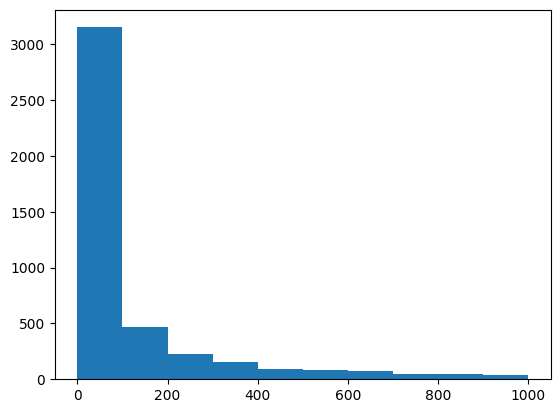

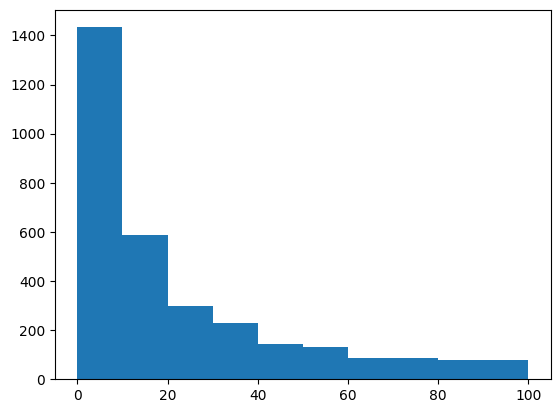

1433


In [12]:
plt.hist(df["vote_count_film"],range =(0,1000))
plt.show()
plt.hist(df["vote_count_film"],range =(0,100))
plt.show()
print((df["vote_count_film"] < 10).sum().sum())

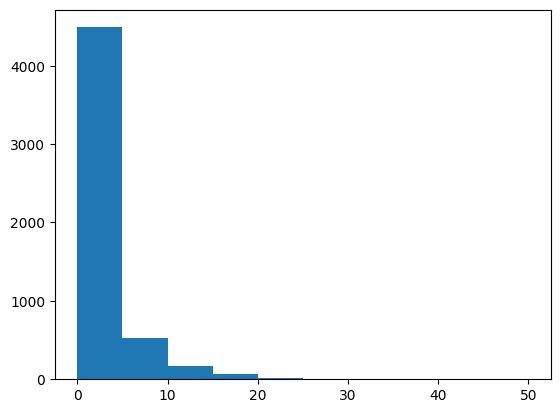

number of outliers for film popularity: 3


In [69]:
x = df["popularity_film"]
plt.hist(x,range=(x.min(), 50))
plt.show()

print(f"number of outliers for film popularity: {(x>x.mean() + 3*x.std()).sum().sum()}")

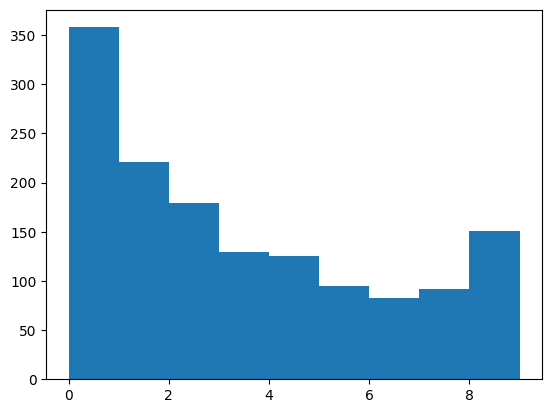

number of outliers for film popularity: 124


In [68]:
x = df["vote_count_film"]
plt.hist(x,range(0,10))
plt.show()

print(f"number of outliers for film popularity: {(x>x.mean() + 3*x.std()).sum().sum()}")

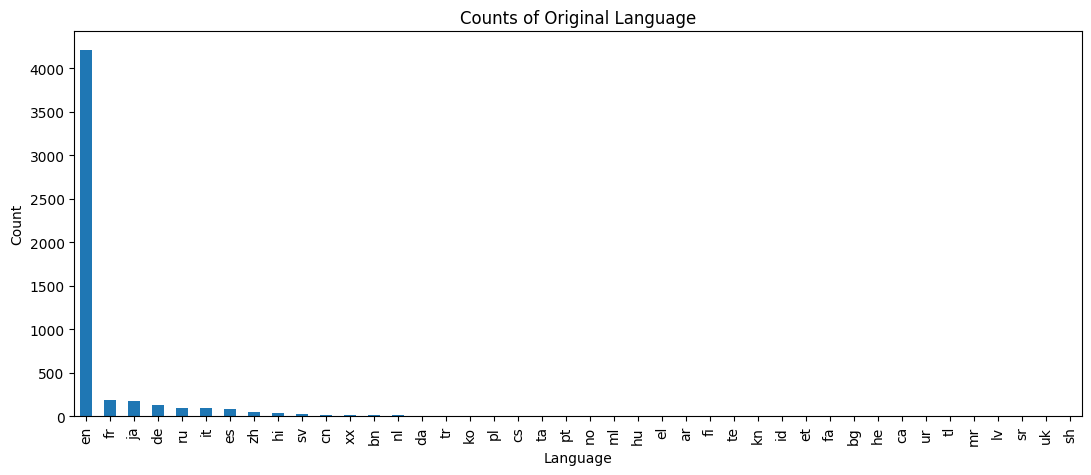

number of NaN:  0
not well presented languages: 
original_language
cs    9
ta    8
pt    8
no    6
ml    6
hu    5
el    5
ar    5
fi    5
te    4
kn    3
id    3
et    3
fa    3
bg    3
he    1
ca    1
ur    1
tl    1
mr    1
lv    1
sr    1
uk    1
sh    1
Name: count, dtype: int64


In [15]:
x = df["original_language"]
x.value_counts().plot(kind='bar', figsize=(13, 5), title='Counts of Original Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

print("number of NaN: ",(x == np.nan).sum().sum())
print("not well presented languages: ")
print(x.value_counts()[x.value_counts() < 10])

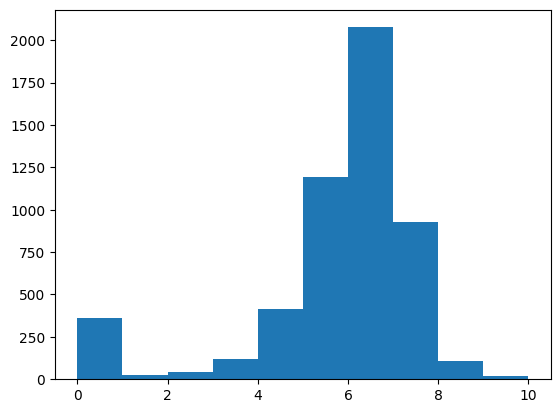

number of outliers for film popularity: 0


In [70]:
x = df["votes_film"]
plt.hist(x)
plt.show()



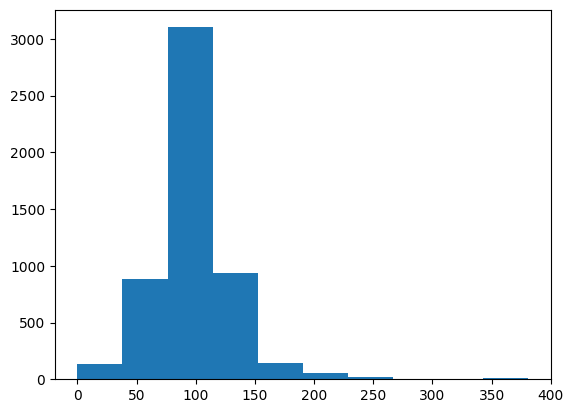

In [17]:
x = df["runtime"]
plt.hist(x)
plt.show()

number of outliers for film budget: 36


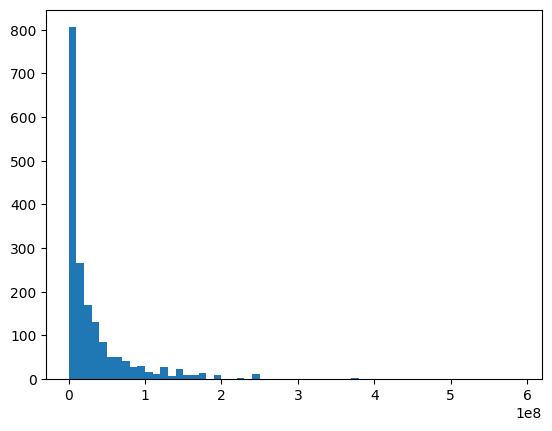

In [64]:
x = df["budget_film"].dropna()
x = x[x>0]

binwidth = 10000000
plt.hist(x,bins=np.arange(min(x), max(x) + binwidth, binwidth))
print(f"number of outliers for film budget: {(x>x.mean() + 3*x.std()).sum().sum()}")

(array([197., 140.,  86.,  67.,  71.,  70.,  48.,  37.,  36.,  18.,  42.,
         21.,  36.,  17.,  28.,  38.,  10.,  22.,  25.,  14.,  49.,   8.,
         13.,   6.,  13.,  58.,   9.,  15.,   9.,   3.,  36.,   5.,  13.,
          2.,   4.,  31.,   4.,   5.,  12.,   4.,  50.,   0.,   3.,   2.,
          4.,  21.,   5.,   3.,   5.,   1.,  41.,   0.,   0.,   1.,   3.,
         12.,   1.,   2.,   1.,   0.,  29.,   2.,   3.,   5.,   2.,   8.,
          3.,   0.,   4.,   0.,  23.,   1.,   0.,   2.,   0.,  13.,   1.,
          0.,   3.,   4.,  18.,   0.,   2.,   0.,   0.,   8.,   0.,   2.,
          0.,   0.,  15.,   0.,   0.,   3.,   1.,   4.,   0.,   0.,   0.,
         23.]),
 array([0.0e+00, 1.0e+06, 2.0e+06, 3.0e+06, 4.0e+06, 5.0e+06, 6.0e+06,
        7.0e+06, 8.0e+06, 9.0e+06, 1.0e+07, 1.1e+07, 1.2e+07, 1.3e+07,
        1.4e+07, 1.5e+07, 1.6e+07, 1.7e+07, 1.8e+07, 1.9e+07, 2.0e+07,
        2.1e+07, 2.2e+07, 2.3e+07, 2.4e+07, 2.5e+07, 2.6e+07, 2.7e+07,
        2.8e+07, 2.9e+07, 3.0e+07,

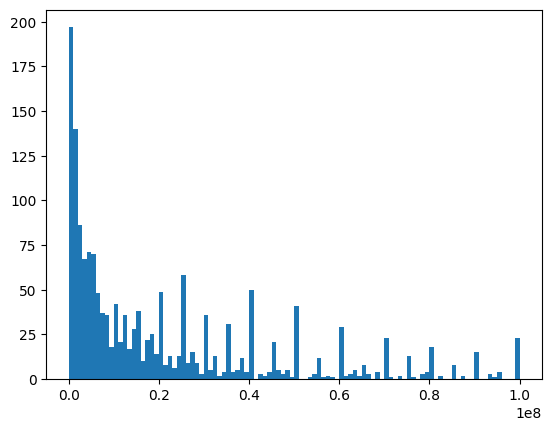

In [49]:
x = df["budget_film"].dropna()
x = x[x>0]
binwidth = 1000000

plt.hist(x,bins=np.arange(0,100000000 + binwidth, binwidth))

number of outliers for film revenue: 57


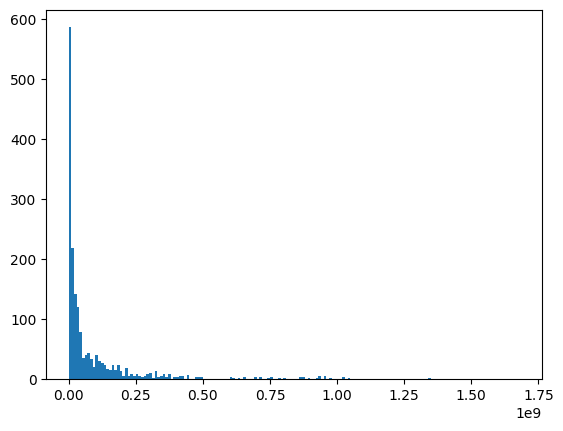

In [66]:
x = df["revenue_film"].dropna()
x = x[x>0]

binwidth = 10000000
plt.hist(x,bins=np.arange(min(x), max(x) + binwidth, binwidth))
print(f"number of outliers for film revenue: {(x>x.mean() + 3*x.std()).sum().sum()}")

(array([152.,  80.,  70.,  64.,  39.,  35.,  42.,  36.,  34.,  25.,  36.,
         23.,  32.,  26.,  25.,  27.,  17.,  20.,   6.,  11.,  20.,  22.,
         24.,  13.,  11.,   8.,   7.,  13.,  13.,  15.,  14.,  10.,  14.,
         16.,  17.,  10.,  10.,   9.,   9.,   8.,  12.,   8.,  20.,   9.,
          4.,   6.,   4.,   9.,   3.,   6.,   6.,   3.,   6.,   0.,   1.,
          6.,   1.,   9.,   2.,   2.,   8.,   5.,   4.,   6.,   0.,   3.,
          4.,   2.,   6.,   3.,   2.,   6.,   5.,   1.,   5.,   5.,  11.,
          3.,   4.,   2.,   2.,   3.,   4.,   0.,   4.,   5.,   3.,   9.,
          1.,   2.,   1.,   2.,   3.,   5.,   2.,   3.,   1.,   1.,   1.,
          2.]),
 array([0.0e+00, 1.0e+06, 2.0e+06, 3.0e+06, 4.0e+06, 5.0e+06, 6.0e+06,
        7.0e+06, 8.0e+06, 9.0e+06, 1.0e+07, 1.1e+07, 1.2e+07, 1.3e+07,
        1.4e+07, 1.5e+07, 1.6e+07, 1.7e+07, 1.8e+07, 1.9e+07, 2.0e+07,
        2.1e+07, 2.2e+07, 2.3e+07, 2.4e+07, 2.5e+07, 2.6e+07, 2.7e+07,
        2.8e+07, 2.9e+07, 3.0e+07,

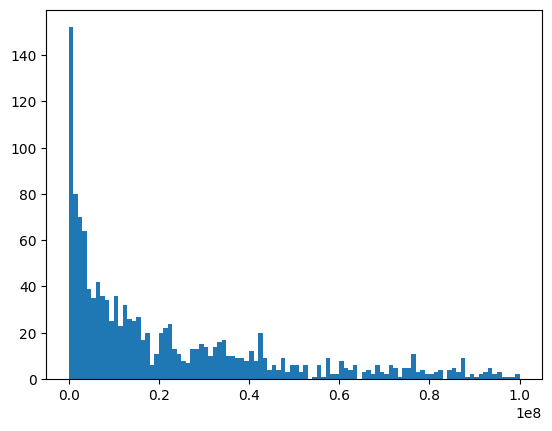

In [67]:
x = df["revenue_film"].dropna()
binwidth = 1000000
x = x[x>0]

plt.hist(x,bins=np.arange(0,100000000 + binwidth, binwidth))